# **Advanced Methods in Natural Language Processing(NLP)**

<p align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/4/41/BSE_primary_logo_color.jpg" width="400" />
</p>

### Final Project

# Part 0: Dataset Selection

> **Objective**: Choose a unique dataset for text classification from the HuggingFace hub, as stated in the course notes.

### 📂 Dataset:
[Big Patent dataset](https://huggingface.co/datasets/NortheasternUniversity/big_patent)

We chose the BigPatent dataset from the HuggingFace (NortheasternUniversity/big_patent). This dataset is made from real U.S. patent documents and our goal is to build a model that can classify each patent into one of the CPC (Cooperative Patent Classification) categories by reading only the abstract(text)

To keep things simple and focused, we are only using the validation split of the dataset. This part includes 67,068 observations.

# Part 1: Setting Up the Problem (1.5 points)

> **Objective**: Understand and establish the baseline for the Big Patent dataset.

### Task 1a: Bibliography and State of the Art(SOA) (0.25 points):

> Present briefly your task by researching and documenting the main objective, a potential business case and the current state of the art for your dataset's task. Include relevant benchmarks and methodologies. You can look at google scholar, NLP index or papers with code.

<span style="color:green"><b>Objective:</b></span>

>The task is multi-class text classification using patent abstracts from the BigPatent dataset. Each abstract describes a technical invention and is labeled with a CPC (Cooperative Patent Classification) code, which categorizes the patent into one of nine technology areas. The goal of this project is to train a model that can automatically predict the correct CPC class from the abstract alone.

So, 

| **Task**      | **Multi-class Text Classification** |
|:--------------|:-----------------------------------|
| **Input**     | Patent **Abstract** (text only)     |
| **Output**    | **CPC Category** (1 of 9 classes)   |



Predicting the correct **CPC (Cooperative Patent Classification)** code for each patent using only its abstract.

<span style="color:green"><b>Potential Business Case:</b></span>

>Although the BigPatent paper (Sharma et al., 2019) mainly focuses on summarization, it gives a very clear understanding of the dataset's structure and the challenges involved. Based on this, we can also understand the potential business use case for our classification task. Patents are often long and technical, and even though the abstract is shorter, it still contains specialized language(domain related) that requires domain knowledge to interpret. Manually reading and classifying large volumes of patent documents is slow and requires expert effort.

> A key business application of this task is to help patent offices (such as the USPTO or EPO) assign the correct CPC classification codes to new patent submissions. This can help keep track of different categories and make patent records easier to manage. It also supports better search tools for patents, similar to organizing books in a library by topic. In addition, legal teams, research departments, and companies can use this classification to organize large sets of technical documents, analyze technology trends, and monitor competitors. Automating this process could save time, reduce human error, and improve consistency across records.

<span style="color:green"><b>Current State of the Art(benchmarks and Methodology):</b></span>

> Patent abstract classification is usually a **multi-class task**, where each abstract is assigned to one technical category like a CPC or IPC code. This can also be extended to **multi-label** problems when patents belong to multiple categories.

>In recent years, transformer-based models (like BERT and XLNet) have become the most successful approach. These models are **pretrained on large text corpora** and then **fine-tuned** for patent classification. They consistently outperform older methods like CNNs (e.g. DeepPatent).

>For tasks like **BigPatent**, which involves only 9 CPC sections, these models perform even better because the classification is broader. For example, **DistilBERT** has reached **80%+ accuracy** when classifying patents into top-level CPC classes.

### Model Benchmarks

| **Model**            | **Task / Dataset**                                     | **Metric**           | **Notes**                                                                 |
|----------------------|--------------------------------------------------------|----------------------|---------------------------------------------------------------------------|
| **DistilBERT**       | CPC section classification (9 classes, BigPatent/USPTO) | 80–90% Accuracy      | High-level CPC section classification (e.g. BigPatent); based on HUPD and USPTO studies |
| **PatentBERT**       | Multi-class classification (600+ IPC classes, USPTO-2M) | ~65–67% Macro F1     | Fine-tuned BERT on patent data; strong results for detailed subclass prediction |
| **XLNet**            | Same task as BERT (USPTO-2M)                            | ~63% Macro F1        | Performs well, slightly lower than BERT                                   |
| **SBERT + k-NN**     | Subclass classification (USPTO)                        | ~66.5% Macro F1      | Uses sentence embeddings with k-nearest neighbor search                   |
| **DeepPatent (CNN)** | Early model using CNN on patent abstracts/claims       | ~43% Macro F1        | Significantly weaker than transformers                                    |


- **Transformer models** like BERT, XLNet, and SBERT are the **current state of the art**.
- They are trained using the **abstract or full patent text** and fine-tuned for CPC/IPC label prediction.
- Performance is measured using **Macro F1** because of class imbalance.
- On broad classification (like 9 CPC classes in BigPatent), models like BERT can achieve **80–90% accuracy**.
- Earlier models like CNNs (e.g. DeepPatent) perform significantly worse.

1. **Lee, J. H., & Hsiang, J. (2020).**  
   *Patent classification by fine-tuning BERT language model.*  
   _Artificial Intelligence and Law, 28_, 109–124.  
   [https://doi.org/10.1007/s10506-019-09256-5](https://doi.org/10.1007/s10506-019-09256-5)

2. **Li, Y., Yoshioka, M., & Masuyama, S. (2018).**  
   *DeepPatent: Patent Classification with Convolutional Neural Networks and Word Embeddings.*  
   In Proceedings of the 17th International Semantic Web Conference.  
   [https://arxiv.org/abs/1805.10816](https://arxiv.org/abs/1805.10816)

3. **Bekamiri, A., Tian, Y., & Pham, T. (2021).**  
   *Patent classification using SBERT and k-nearest neighbors.*  
   In: Proceedings of the International Conference on Knowledge Engineering and Applications (ICKEA).  
   [https://doi.org/10.1145/3507911.3507932](https://doi.org/10.1145/3507911.3507932)

4. **Sharma, A., Xie, P., & Paul, S. (2019).**  
   *BIGPatent: A Large-Scale Dataset for Abstractive and Coherent Summarization.*  
   In Proceedings of ACL 2019.  
   [https://arxiv.org/abs/1906.03741](https://arxiv.org/abs/1906.03741)

5. **Beltagy, I., Peters, M. E., & Cohan, A. (2020).**  
   *Longformer: The Long-Document Transformer.*  
   [https://arxiv.org/abs/2004.05150](https://arxiv.org/abs/2004.05150)

### Task 1B: Dataset Description (0.5 points):

> Provide a brief overview of your dataset, including size, class distribution, and any peculiar characteristics. Include basic descriptive statistics.

In [1]:
# Importing required packages 

import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tabulate import tabulate
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
import os
from tqdm import tqdm
import re

# Ignore warnings
warnings.filterwarnings('ignore')

# Set random seed
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Plotting style
plt.style.use('ggplot')
sns.set_palette("Set2")

In [ ]:
# Loading dataset (already downloaded)
df = pd.read_csv('patent_corpus.csv')

# Creating 60/20/20 split (train/validation/test) using random sampling
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Saving splits
os.makedirs("data/splits", exist_ok=True)
train_df.to_csv("data/splits/train.csv", index=False)
validation_df.to_csv("data/splits/validation.csv", index=False)
test_df.to_csv("data/splits/test.csv", index=False)

In [3]:
# 5 random sample rows from the overall dataset 
sample_rows = df.sample(5, random_state=RANDOM_SEED)
print(tabulate(sample_rows, headers='keys', tablefmt='grid', showindex=False))

+----------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [4]:
# Dataset summary with count and percentage (sorted by decreasing count) to understand distribution among classes
def dataset_summary(data, name):
    shape = data.shape
    label_counts = data['label'].value_counts()
    label_perc = data['label'].value_counts(normalize=True) * 100
    label_stats = [
        f"{lbl} ({label_counts[lbl]}, {label_perc[lbl]:.2f}%)"
        for lbl in label_counts.index
    ]
    label_stats_str = ", ".join(label_stats)
    return [name, shape, label_stats_str]

# Summarize each dataset
summaries = [
    dataset_summary(df, "Overall Dataset"),
    dataset_summary(train_df, "Train Dataset"),
    dataset_summary(validation_df, "Validation Dataset"),
    dataset_summary(test_df, "Test Dataset")
]

# Display the summary in tabular format
headers = ["Dataset", "Shape", "Label Count"]
print(tabulate(summaries, headers=headers, tablefmt="grid"))

+--------------------+------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Dataset            | Shape      | Label Count                                                                                                                                                   |
+====================+============+===============================================================================================================================================================+
| Overall Dataset    | (67068, 3) | g (14385, 21.45%), h (14279, 21.29%), a (9674, 14.42%), b (8973, 13.38%), y (6911, 10.30%), c (5613, 8.37%), f (4754, 7.09%), e (1914, 2.85%), d (565, 0.84%) |
+--------------------+------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Train Dataset     

In [5]:
print(df.dtypes)

publication_number    object
abstract              object
label                 object
dtype: object


In [6]:
# Function to check for missing values in a dataset
def check_missing_values(data, name):
    missing_values = data.isnull().sum().to_dict()
    return [name, missing_values]

# Check for missing values in each dataset
missing_values_summary = [
    check_missing_values(df, "Overall Dataset"),
    check_missing_values(train_df, "Train Dataset"),
    check_missing_values(validation_df, "Validation Dataset"),
    check_missing_values(test_df, "Test Dataset")
]

# Display the missing values summary in tabular format
headers = ["Dataset", "Missing Values"]
print(tabulate(missing_values_summary, headers=headers, tablefmt="grid"))

+--------------------+------------------------------------------------------+
| Dataset            | Missing Values                                       |
+====================+======================================================+
| Overall Dataset    | {'publication_number': 0, 'abstract': 0, 'label': 0} |
+--------------------+------------------------------------------------------+
| Train Dataset      | {'publication_number': 0, 'abstract': 0, 'label': 0} |
+--------------------+------------------------------------------------------+
| Validation Dataset | {'publication_number': 0, 'abstract': 0, 'label': 0} |
+--------------------+------------------------------------------------------+
| Test Dataset       | {'publication_number': 0, 'abstract': 0, 'label': 0} |
+--------------------+------------------------------------------------------+


In [7]:
# Show the number of unique labels in each dataset
for dset, dname in [(df, "Overall Dataset"),
                    (train_df, "Train Dataset"),
                    (validation_df, "Validation Dataset"),
                    (test_df, "Test Dataset")]:
    print(f"{dname}: {dset['label'].nunique()} unique labels")

Overall Dataset: 9 unique labels
Train Dataset: 9 unique labels
Validation Dataset: 9 unique labels
Test Dataset: 9 unique labels


In [8]:
# Checking for the duplicate entries in the overall dataset based on all columns
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate entries in the overall dataset: {num_duplicates}")

Number of duplicate entries in the overall dataset: 0


In [9]:
# Checking for duplicate abstracts in the overall dataset
num_duplicate_abstracts = df['abstract'].duplicated().sum()
print(f"Number of duplicate abstracts in the overall dataset: {num_duplicate_abstracts}")

Number of duplicate abstracts in the overall dataset: 1329


In [10]:
# Checking Samples where we have duplicate duplicate_abstracts
duplicate_abstracts = df[df['abstract'].duplicated(keep=False)].sort_values('abstract')
print(tabulate(duplicate_abstracts.head(2), headers='keys', tablefmt='grid', showindex=False))

+----------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+
| publication_number   | abstract                                                                                         

> Although all publication numbers in the dataset are unique, we observed that some abstracts are duplicated with the same label. Keeping such entries does not add value, as they represent repeated information for the same class. Therefore, we have decided to drop these duplicate abstracts (where both the abstract text and label are identical) to ensure that each abstract-label pair is unique in our dataset.

In [11]:
# Drop duplicate abstracts, keeping the first occurrence
df = df.drop_duplicates(subset='abstract').reset_index(drop=True)
train_df = train_df.drop_duplicates(subset='abstract').reset_index(drop=True)
validation_df = validation_df.drop_duplicates(subset='abstract').reset_index(drop=True)
test_df = test_df.drop_duplicates(subset='abstract').reset_index(drop=True)

In [12]:
# Recheck duplicates for confirmation
def check_duplicates(data, name):
    dup_abs = data['abstract'].duplicated().sum()
    dup_pub = data['publication_number'].duplicated().sum()
    return [name, dup_abs, dup_pub]

results_after_dedup = [
    check_duplicates(train_df, "Train Dataset"),
    check_duplicates(validation_df, "Validation Dataset"),
    check_duplicates(test_df, "Test Dataset")
]
headers = ["Dataset", "Duplicate Abstracts", "Duplicate Publication Numbers"]
print(tabulate(results_after_dedup, headers=headers, tablefmt="grid"))

+--------------------+-----------------------+---------------------------------+
| Dataset            |   Duplicate Abstracts |   Duplicate Publication Numbers |
+====================+=======================+=================================+
| Train Dataset      |                     0 |                               0 |
+--------------------+-----------------------+---------------------------------+
| Validation Dataset |                     0 |                               0 |
+--------------------+-----------------------+---------------------------------+
| Test Dataset       |                     0 |                               0 |
+--------------------+-----------------------+---------------------------------+


> **Note:** We observed that the percentage of duplicate abstracts in the dataset is very small. This minor duplication does not significantly affect the class distribution or the integrity of the dataset. Therefore, we will proceed with the existing train/validation/test split without re-splitting the data.

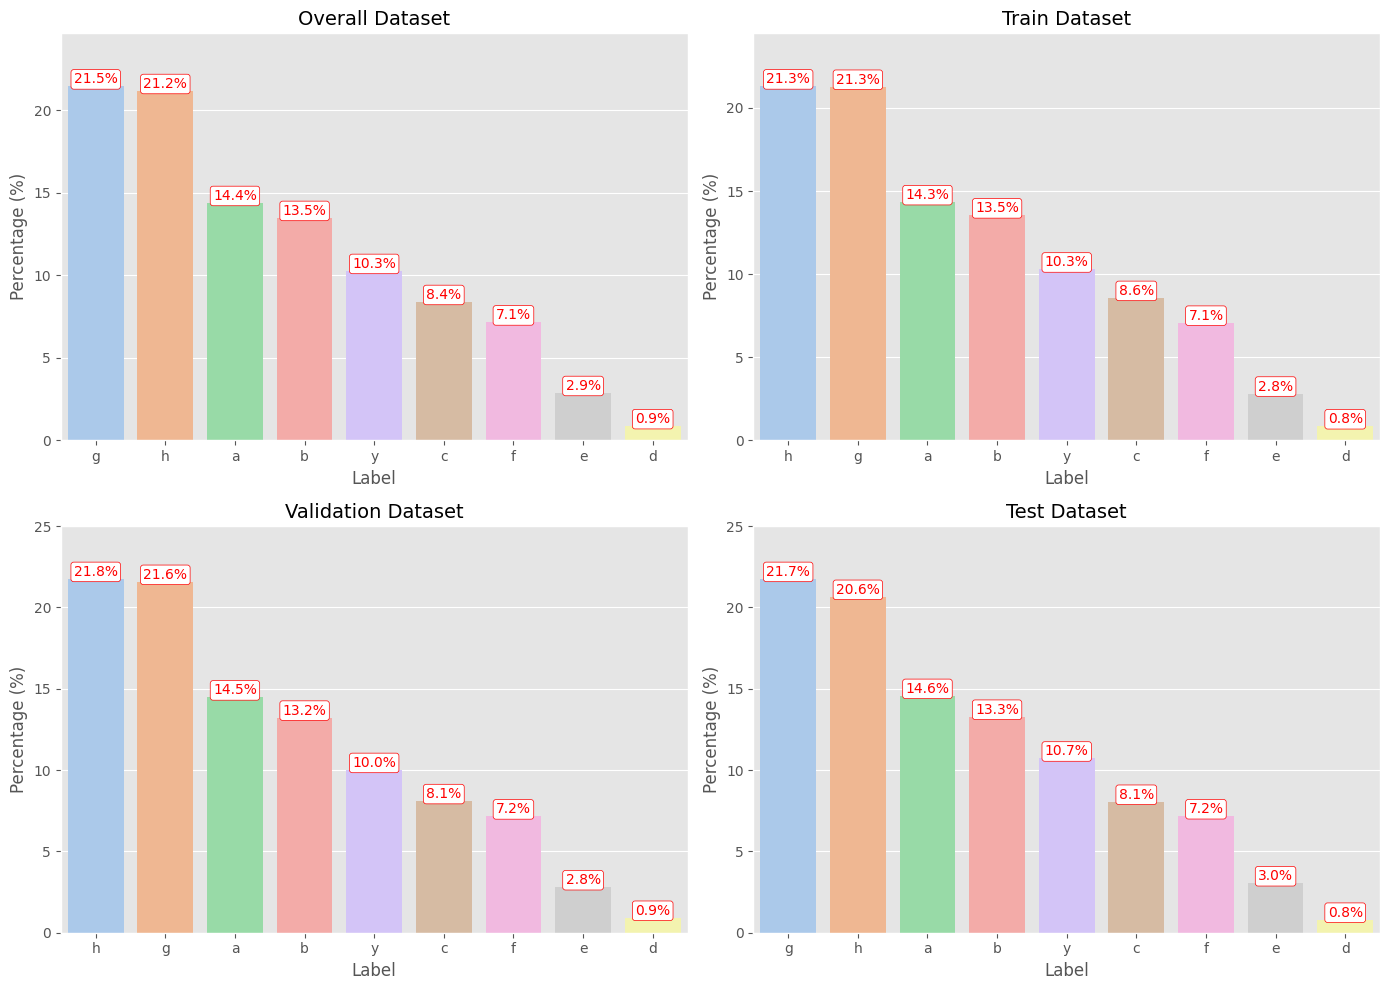

In [13]:
def plot_label_percent(ax, data, title, palette="pastel"):
    total = len(data)
    label_counts = data['label'].value_counts(normalize=True) * 100
    order = data['label'].value_counts().index  # descending order by count
    sns.barplot(
        x=order,
        y=label_counts.loc[order].values,
        ax=ax,
        palette=palette
    )
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Label', fontsize=12)
    ax.set_ylabel('Percentage (%)', fontsize=12)
    ax.set_ylim(0, label_counts.max() * 1.15)
    for i, p in enumerate(ax.patches):
        label = f"{p.get_height():.1f}%"
        ax.annotate(
            label,
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center', va='bottom',
            color='red',
            fontsize=10,
            bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.2')
        )
    ax.tick_params(axis='x')

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plot_label_percent(axes[0,0], df, "Overall Dataset", palette="pastel")
plot_label_percent(axes[0,1], train_df, "Train Dataset", palette="pastel")
plot_label_percent(axes[1,0], validation_df, "Validation Dataset", palette="pastel")
plot_label_percent(axes[1,1], test_df, "Test Dataset", palette="pastel")
plt.tight_layout()
plt.show()

> The dataset shows clear class imbalance labels g and h are most frequent, while d and e are rare and this pattern is consistent across all splits, meaning the data was split properly, and we will need to handle this imbalance during modeling to improve performance on all classes

In [14]:
# Character and token length stats
char_lengths = train_df['abstract'].str.len()
token_lengths = train_df['abstract'].str.split().str.len()

print(f"Avg characters per abstract: {char_lengths.mean():.0f}")
print(f"Median characters: {char_lengths.median():.0f}")
print(f"95th percentile (chars): {char_lengths.quantile(0.95):.0f}")
print(f"Max characters: {char_lengths.max()}")

print(f"\nAvg tokens per abstract: {token_lengths.mean():.0f}")
print(f"Median tokens: {token_lengths.median():.0f}")
print(f"95th percentile (tokens): {token_lengths.quantile(0.95):.0f}")
print(f"Max tokens: {token_lengths.max()}")



Avg characters per abstract: 677
Median characters: 648
95th percentile (chars): 1183
Max characters: 8408

Avg tokens per abstract: 107
Median tokens: 103
95th percentile (tokens): 191
Max tokens: 420


> The average patent abstract in our dataset contains 677 characters and 107 tokens, with 95% of abstracts shorter than 1,183 characters and 191 tokens. The longest abstract is 8,408 characters (420 tokens), which is well within the 512-token input limit of standard BERT-based models.

### Task 1C: Random Classifier Performance (0.25 points):

> Calculate the expected performance of a random classifier for your dataset to set a benchmark. The calculation should include an  implementation.

To evaluate the difficulty of our classification task, we implemented three random classifier strategies as baselines:

- **Stratified**: Respects our class distribution by predicting labels proportionally.
- **Uniform**: Ignores class imbalance and assume each class is equally likely.
- **Most Frequent**: Always predicts the majority class 

These help assess how much better our actual models need to perform to be meaningful.

We begin by calculating the theoretical expected accuracy of a stratified random classifier using class probabilities from the training set. Then, we evaluate three dummy classifiers (stratified, uniform, most frequent) to set practical performance baselines for our multi-class classification task.


In [15]:
# Theoretical Stratified Accuracy (Prior-Based)
label_counts = Counter(train_df['label'])
total_samples = sum(label_counts.values())
class_probs = np.array([count / total_samples for count in label_counts.values()])
theoretical_accuracy = np.sum(class_probs ** 2)

print(f"Theoretical Stratified Accuracy: {theoretical_accuracy:.4f} ({theoretical_accuracy * 100:.2f}%)")


Theoretical Stratified Accuracy: 0.1532 (15.32%)


In [16]:
# Define strategies and results storage
strategies = ['stratified', 'uniform', 'most_frequent']
results = {}

# Evaluate dummy classifiers
for strategy in strategies:
    clf = DummyClassifier(strategy=strategy, random_state=42)
    clf.fit(train_df['abstract'], train_df['label'])
    preds = clf.predict(test_df['abstract'])
    
    report = classification_report(test_df['label'], preds, output_dict=True, zero_division=0)
    results[strategy] = {
        'accuracy': report['accuracy'] * 100,
        'precision': report['macro avg']['precision'] * 100,
        'recall': report['macro avg']['recall'] * 100,
        'f1': report['macro avg']['f1-score'] * 100
    }


In [17]:
# Show results as DataFrame
results_df = pd.DataFrame(results).T.round(2)
print(results_df)

               accuracy  precision  recall     f1
stratified        15.74      11.23   11.21  11.22
uniform           11.51      11.49   11.62  10.27
most_frequent     20.65       2.29   11.11   3.80


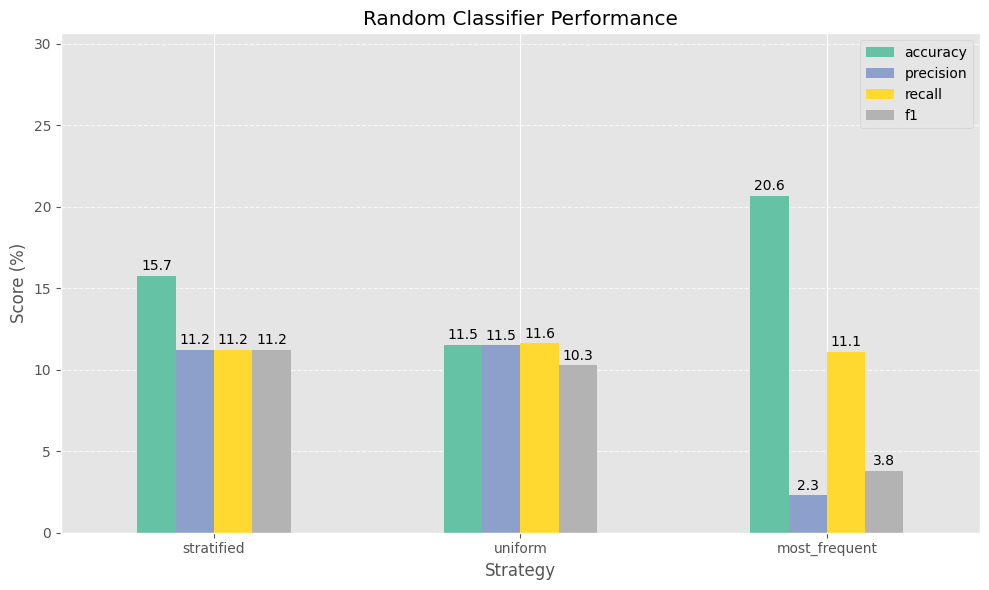

In [18]:
# Plot
ax = results_df.plot(kind='bar', figsize=(10, 6), colormap='Set2', rot=0)
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f', label_type='edge', padding=2)
plt.title("Random Classifier Performance")
plt.ylabel("Score (%)")
plt.xlabel("Strategy")
plt.ylim(0, results_df.values.max() + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
# Detailed per-class analysis for all three random classifier strategies
print("Per-Class Performance Comparison:")
print("=" * 70)

strategies = ['stratified', 'uniform', 'most_frequent']
strategy_results = {}

for strategy in strategies:
    clf = DummyClassifier(strategy=strategy, random_state=42)
    clf.fit(train_df['abstract'], train_df['label'])
    preds = clf.predict(test_df['abstract'])
    
    report = classification_report(test_df['label'], preds, output_dict=True, zero_division=0)
    strategy_results[strategy] = report

# Create comprehensive comparison table
class_comparison = []
labels = sorted(test_df['label'].unique())

for label in labels:
    row = [label]
    for strategy in strategies:
        if label in strategy_results[strategy]:
            f1 = strategy_results[strategy][label]['f1-score'] * 100
            recall = strategy_results[strategy][label]['recall'] * 100
            row.append(f"{f1:.1f}%")
        else:
            row.append("0.0%")
    
    # Add support count
    support = strategy_results['stratified'][label]['support'] if label in strategy_results['stratified'] else 0
    row.append(support)
    class_comparison.append(row)

headers = ["Class", "Stratified F1", "Uniform F1", "Most Freq F1", "Support"]
print(tabulate(class_comparison, headers=headers, tablefmt="grid"))


Per-Class Performance Comparison:
+---------+-----------------+--------------+----------------+-----------+
| Class   | Stratified F1   | Uniform F1   | Most Freq F1   |   Support |
+=========+=================+==============+================+===========+
| a       | 15.0%           | 13.2%        | 0.0%           |      1944 |
+---------+-----------------+--------------+----------------+-----------+
| b       | 13.1%           | 13.5%        | 0.0%           |      1773 |
+---------+-----------------+--------------+----------------+-----------+
| c       | 7.5%            | 9.2%         | 0.0%           |      1075 |
+---------+-----------------+--------------+----------------+-----------+
| d       | 0.0%            | 1.5%         | 0.0%           |       107 |
+---------+-----------------+--------------+----------------+-----------+
| e       | 2.8%            | 6.0%         | 0.0%           |       406 |
+---------+-----------------+--------------+----------------+-----------+
| f 

In [20]:
# Show overall metrics
print("\nOverall Performance Summary:")
print("-" * 40)
for strategy in strategies:
    acc = strategy_results[strategy]['accuracy'] * 100
    macro_f1 = strategy_results[strategy]['macro avg']['f1-score'] * 100
    print(f"{strategy.capitalize():>12}: {acc:.1f}% accuracy, {macro_f1:.1f}% macro F1")


Overall Performance Summary:
----------------------------------------
  Stratified: 15.7% accuracy, 11.2% macro F1
     Uniform: 11.5% accuracy, 10.3% macro F1
Most_frequent: 20.6% accuracy, 3.8% macro F1


• Most Frequent strategy shows 0% F1 for all classes except the majority class

• Stratified and Uniform show similar F1 scores but stratified respects class distribution

• Rare classes (d, e) have consistently low performance across all strategies

Our random classifier reveals the inherent difficulty of the BigPatent classification task due to severe class imbalance.

The stratified random classifier achieves 15.74% accuracy (closely matching theoretical 15.32%), which respects class distributions and provides the most realistic baseline.

The uniform classifier performs worse at 11.51% because it ignores that frequent classes (g, h) appear ~25x more than rare classes (d, e), demonstrating how imbalance affects random performance.

The most frequent classifier achieves higher overall accuracy (20.65%) by always predicting the majority class, but this results in 0% recall for minority classes, making it useless for practical applications.

These results indicate our task is moderately challenging - random guessing succeeds ~1 in 6 times - and that minority classes (d, e) will be particularly difficult for any model due to their extreme rarity (<1-3% of data).

### Task 1D: Baseline Implementation (0.5 points):

> Develop a rule-based classifier as a baseline. Discuss its performance in the context of the dataset's complexity and compare it with human-level performance if available.

> Created a true rule-based classifier using domain knowledge. This approach relies on explicit IF-THEN rules, and to support keyword selection, we used ChatGPT to identify domain-relevant terms associated with each CPC class.

In [21]:
# defining what each CPC class represents

CPC_DEFINITIONS = {
    'a': {
        'name': 'Human Necessities',
        'domains': ['food', 'agriculture', 'medical', 'furniture', 'games'],
        'keywords': ['food', 'agriculture', 'medical', 'drug', 'patient', 'treatment', 'game', 
                    'furniture', 'chair', 'table', 'cooking', 'nutrition', 'health']
    },
    'b': {
        'name': 'Performing Operations; Transporting', 
        'domains': ['cutting', 'shaping', 'printing', 'transport'],
        'keywords': ['cutting', 'blade', 'printing', 'transport', 'vehicle', 'conveyor',
                    'manufacturing', 'processing', 'operation', 'machine', 'tool']
    },
    'c': {
        'name': 'Chemistry; Metallurgy',
        'domains': ['chemistry', 'materials', 'metallurgy'],
        'keywords': ['chemical', 'compound', 'reaction', 'catalyst', 'polymer', 'metal',
                    'alloy', 'composition', 'solution', 'synthesis', 'organic', 'inorganic']
    },
    'd': {
        'name': 'Textiles; Paper',
        'domains': ['textiles', 'fibers', 'paper'],
        'keywords': ['textile', 'fiber', 'fabric', 'yarn', 'paper', 'pulp', 'thread',
                    'weaving', 'spinning', 'cloth', 'cotton', 'wool']
    },
    'e': {
        'name': 'Fixed Constructions',
        'domains': ['buildings', 'construction', 'structures'],
        'keywords': ['building', 'construction', 'structure', 'foundation', 'wall',
                    'roof', 'concrete', 'steel', 'bridge', 'tunnel', 'architectural']
    },
    'f': {
        'name': 'Mechanical Engineering',
        'domains': ['engines', 'machines', 'lighting', 'heating'],
        'keywords': ['engine', 'motor', 'mechanical', 'heating', 'cooling', 'pump',
                    'valve', 'gear', 'bearing', 'combustion', 'lighting', 'lamp']
    },
    'g': {
        'name': 'Physics',
        'domains': ['instruments', 'optics', 'photography', 'measuring'],
        'keywords': ['optical', 'lens', 'measurement', 'sensor', 'instrument', 'physics',
                    'radiation', 'laser', 'detector', 'signal', 'frequency', 'wave']
    },
    'h': {
        'name': 'Electricity',
        'domains': ['electrical', 'electronics', 'computing'],
        'keywords': ['electrical', 'electronic', 'circuit', 'voltage', 'current', 'power',
                    'semiconductor', 'transistor', 'computer', 'digital', 'antenna', 'cable']
    },
    'y': {
        'name': 'General Tagging',
        'domains': ['cross-sectional', 'emerging'],
        'keywords': ['new', 'emerging', 'technology', 'cross', 'general', 'novel',
                    'innovative', 'advanced', 'improved', 'enhanced']
    }
}

print("CPC Class Definitions for Rule-Based Classification:")
print("=" * 60)
for code, info in CPC_DEFINITIONS.items():
    print(f"Class {code}: {info['name']}")
    print(f"  Keywords: {', '.join(info['keywords'][:8])}...")
    print()

CPC Class Definitions for Rule-Based Classification:
Class a: Human Necessities
  Keywords: food, agriculture, medical, drug, patient, treatment, game, furniture...

Class b: Performing Operations; Transporting
  Keywords: cutting, blade, printing, transport, vehicle, conveyor, manufacturing, processing...

Class c: Chemistry; Metallurgy
  Keywords: chemical, compound, reaction, catalyst, polymer, metal, alloy, composition...

Class d: Textiles; Paper
  Keywords: textile, fiber, fabric, yarn, paper, pulp, thread, weaving...

Class e: Fixed Constructions
  Keywords: building, construction, structure, foundation, wall, roof, concrete, steel...

Class f: Mechanical Engineering
  Keywords: engine, motor, mechanical, heating, cooling, pump, valve, gear...

Class g: Physics
  Keywords: optical, lens, measurement, sensor, instrument, physics, radiation, laser...

Class h: Electricity
  Keywords: electrical, electronic, circuit, voltage, current, power, semiconductor, transistor...

Class y: G

Defining the core logic for our rule-based classifier. This class uses:

- Domain-specific keyword matching (from CPC definitions) (above cell)
- Explicit IF-THEN rules for strong domain signals
- Weighted scoring based on keyword specificity
- Fallback logic to assign a default label when no match is found

In [22]:
# Implementing Rule-Based Classifier with Explicit Logic
class PatentRuleBasedClassifier:
    def __init__(self):
        self.class_definitions = CPC_DEFINITIONS
        self.fallback_order = ['h', 'g', 'a', 'b', 'y', 'c', 'f', 'e', 'd']  

    def preprocess_text(self, text):
        """Clean and normalize text for rule matching"""
        text = text.lower()
        # Removing special characters but keep spaces
        text = re.sub(r'[^\w\s]', ' ', text)
        # Removing extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    
    def calculate_class_scores(self, text):
        """Calculate scores for each class based on keyword matches"""
        text = self.preprocess_text(text)
        scores = defaultdict(float)
        
        for class_code, definition in self.class_definitions.items():
            keywords = definition['keywords']
            
            # Counting the keyword matches with word boundaries
            for keyword in keywords:
                pattern = r'\b' + re.escape(keyword) + r'\b'
                matches = len(re.findall(pattern, text))
                if matches > 0:
                    # Weight by keyword specificity (longer keywords getting higher weight)
                    weight = len(keyword) / 10.0 + 1.0
                    scores[class_code] += matches * weight
        
        return scores
    
    def apply_domain_rules(self, text, scores):
        """Apply explicit domain-specific rules"""
        text = self.preprocess_text(text)
        
        # Rule 1: Strong electrical indicators
        electrical_patterns = [
            r'\b(electronic|electrical|circuit|voltage|current|semiconductor)\b',
            r'\b(transistor|amplifier|processor|microprocessor|cpu)\b',
            r'\b(digital|analog|signal processing|communication)\b'
        ]
        for pattern in electrical_patterns:
            if re.search(pattern, text):
                scores['h'] += 3.0
        
        # Rule 2: Strong chemistry indicators  
        chemistry_patterns = [
            r'\b(chemical|compound|molecule|reaction|catalyst)\b',
            r'\b(polymer|synthesis|organic|inorganic|composition)\b',
            r'\b(acid|base|solution|mixture|alloy)\b'
        ]
        for pattern in chemistry_patterns:
            if re.search(pattern, text):
                scores['c'] += 3.0
        
        # Rule 3: Medical/pharmaceutical (class a)
        medical_patterns = [
            r'\b(medical|pharmaceutical|drug|medicine|treatment)\b',
            r'\b(patient|therapy|diagnostic|clinical|biological)\b',
            r'\b(disease|infection|cancer|protein|gene)\b'
        ]
        for pattern in medical_patterns:
            if re.search(pattern, text):
                scores['a'] += 3.0
        
        # Rule 4: Mechanical systems (class f)
        mechanical_patterns = [
            r'\b(engine|motor|mechanical|machine|pump)\b',
            r'\b(valve|gear|bearing|shaft|piston)\b',
            r'\b(heating|cooling|combustion|thermal)\b'
        ]
        for pattern in mechanical_patterns:
            if re.search(pattern, text):
                scores['f'] += 3.0
        
        # Rule 5: Optical/physics (class g)
        physics_patterns = [
            r'\b(optical|lens|laser|radiation|frequency)\b',
            r'\b(sensor|detector|measurement|instrument|physics)\b',
            r'\b(wave|spectrum|imaging|microscope)\b'
        ]
        for pattern in physics_patterns:
            if re.search(pattern, text):
                scores['g'] += 3.0
        
        return scores
    
    def classify(self, abstract):
        """Main classification method using explicit rules"""
        #  Calculating keyword-based scores
        scores = self.calculate_class_scores(abstract)
        
        # Applying domain-specific rules
        scores = self.apply_domain_rules(abstract, scores)
        
        # Handling edge cases
        if not scores or max(scores.values()) == 0:
            # If no matches, return most frequent class from training data
            return 'h'  # Most frequent class
        
        # Return class with highest score
        return max(scores, key=scores.get)

# Initialize the rule-based classifier
rule_classifier = PatentRuleBasedClassifier()

In [23]:
# Testing Rule-Based Classifier Performance and applying classifier to test set
rule_based_predictions = [rule_classifier.classify(abstract) for abstract in test_df['abstract']]
rule_based_accuracy = accuracy_score(test_df['label'], rule_based_predictions)
rule_based_report = classification_report(test_df['label'], rule_based_predictions, output_dict=True)

print(f"Accuracy: {rule_based_accuracy*100:.2f}%")
print(f"Macro F1: {rule_based_report['macro avg']['f1-score']*100:.2f}%")
print(f"Weighted F1: {rule_based_report['weighted avg']['f1-score']*100:.2f}%")

# Comparing with random baselines
print(f"\nImprovement over Stratified Random: +{(rule_based_accuracy - 0.1574)*100:.2f} percentage points")
print(f"Improvement over Most Frequent: {(rule_based_accuracy - 0.2065)*100:+.2f} percentage points")

Accuracy: 32.27%
Macro F1: 28.09%
Weighted F1: 30.06%

Improvement over Stratified Random: +16.53 percentage points
Improvement over Most Frequent: +11.62 percentage points


To check how the rule-based classifier performs across different CPC classes, we checked per-class performance 

In [24]:
# Per-Class Performance Analysis
print("Per-Class Performance Analysis:")

# Creating detailed per-class comparison table
class_performance = []
labels = sorted(test_df['label'].unique())

for label in labels:
    if label in rule_based_report:
        class_performance.append([
            label,
            CPC_DEFINITIONS[label]['name'][:20] + "...",
            f"{rule_based_report[label]['precision']*100:.1f}%",
            f"{rule_based_report[label]['recall']*100:.1f}%",
            f"{rule_based_report[label]['f1-score']*100:.1f}%",
            int(rule_based_report[label]['support'])
        ])

headers = ["Class", "Domain", "Precision", "Recall", "F1-Score", "Support"]
print(tabulate(class_performance, headers=headers, tablefmt="grid"))

Per-Class Performance Analysis:
+---------+-------------------------+-------------+----------+------------+-----------+
| Class   | Domain                  | Precision   | Recall   | F1-Score   |   Support |
+=========+=========================+=============+==========+============+===========+
| a       | Human Necessities...    | 50.4%       | 20.9%    | 29.6%      |      1944 |
+---------+-------------------------+-------------+----------+------------+-----------+
| b       | Performing Operation... | 28.8%       | 19.5%    | 23.3%      |      1773 |
+---------+-------------------------+-------------+----------+------------+-----------+
| c       | Chemistry; Metallurg... | 33.1%       | 49.0%    | 39.5%      |      1075 |
+---------+-------------------------+-------------+----------+------------+-----------+
| d       | Textiles; Paper...      | 20.5%       | 36.4%    | 26.3%      |       107 |
+---------+-------------------------+-------------+----------+------------+-----------+


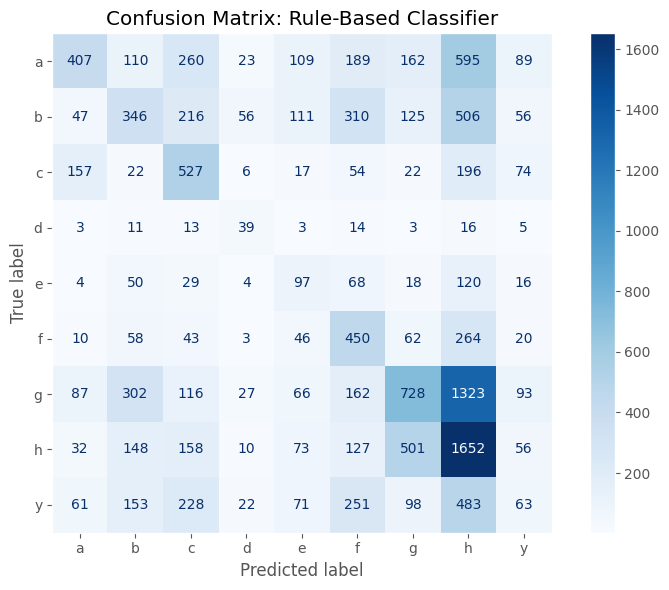

In [25]:
# confusion matrix
cm = confusion_matrix(test_df['label'], rule_based_predictions, labels=sorted(test_df['label'].unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(CPC_DEFINITIONS.keys()))
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap="Blues")
plt.title("Confusion Matrix: Rule-Based Classifier")
plt.grid(False)
plt.tight_layout()
plt.show()




> The **rule-based classifier** achieved **32.27% accuracy**, a **macro F1-score of 28.09%**, and **weighted F1-score of 30.06%** on the test set — **significantly outperforming all random baselines** (*Stratified*: **15.74%**, *Most Frequent*: **20.65%**).
>
> It performed best on technically distinct classes such as **'h' (Electricity, F1 = 41.8%)** and **'c' (Chemistry, F1 = 39.5%)**, but struggled on more abstract or overlapping categories like **'y' (General Tagging, F1 = 6.6%)** and rare classes such as **'e'** and **'d'**. This reflects the limitations of rule-based approaches in handling nuanced or sparse data.

>The **confusion matrix** also shows frequent misclassification into dominant classes like **'h'**, **'g'**, or **'y'**, revealing fallback behavior and lack of semantic generalization.
>
> These results establish an **interpretable baseline** and clearly explain the need for machine learning models to capture deeper linguistic patterns and generalize better across classes.


In [26]:
# Calculating TP, FP, TN, FN for each class for the rule-based classifier on the test set
y_true = test_df['label']
y_pred = rule_based_predictions
all_classes = sorted(CPC_DEFINITIONS.keys())
mcm = multilabel_confusion_matrix(y_true, y_pred, labels=all_classes)

# Collecting TP, FP, TN, FN for each class
tp_fp_tn_fn = []
for idx, class_label in enumerate(all_classes):
    tn, fp, fn, tp = mcm[idx].ravel()
    tp_fp_tn_fn.append([class_label, int(tp), int(fp), int(tn), int(fn)])
print(tabulate(tp_fp_tn_fn, headers=['Class', 'TP', 'FP', 'TN', 'FN'], tablefmt='grid'))

+---------+------+------+-------+------+
| Class   |   TP |   FP |    TN |   FN |
+=========+======+======+=======+======+
| a       |  407 |  401 | 11007 | 1537 |
+---------+------+------+-------+------+
| b       |  346 |  854 | 10725 | 1427 |
+---------+------+------+-------+------+
| c       |  527 | 1063 | 11214 |  548 |
+---------+------+------+-------+------+
| d       |   39 |  151 | 13094 |   68 |
+---------+------+------+-------+------+
| e       |   97 |  496 | 12450 |  309 |
+---------+------+------+-------+------+
| f       |  450 | 1175 | 11221 |  506 |
+---------+------+------+-------+------+
| g       |  728 |  991 |  9457 | 2176 |
+---------+------+------+-------+------+
| h       | 1652 | 3503 |  7092 | 1105 |
+---------+------+------+-------+------+
| y       |   63 |  409 | 11513 | 1367 |
+---------+------+------+-------+------+


>The rule-based classifier achieves high true positives for clear technical classes like Electricity ('h', TP = 1652) and Chemistry ('c', TP = 527), but also generates many false positives—especially for 'h' (FP = 3503)—indicating that electrical keywords are frequently overmatched across classes.

>Rare classes such as 'd' and 'e' have very low true positives (TP = 39 and 97, respectively), highlighting the difficulty in detecting underrepresented or overlapping categories. Overall, the model tends to over-predict frequent or generic classes, while struggling with both precision and recall on minority labels. This emphasizes the need for more flexible machine learning models that can better understand context and reduce both false positives and false negatives.

### TF-IDF + Logistic Regression Statistical Baseline

In [27]:
# TF-IDF + Logistic Regression Pipeline
tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=5000,      # Limiting vocabulary size
        min_df=5,               # Removing rare words (appear in <5 documents)
        max_df=0.8,             # Removing too common words (appear in >80% documents)
        ngram_range=(1, 2),     # Using unigrams and bigrams
        stop_words='english'    # Removing English stopwords
    )),
    ('classifier', LogisticRegression(
        class_weight='balanced',  # To handle class imbalance
        max_iter=1000,
        random_state=RANDOM_SEED
    ))
])

# Train the TF-IDF baseline classifier
tfidf_pipeline.fit(train_df['abstract'], train_df['label'])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, max_features=5000, min_df=5,
                                 ngram_range=(1, 2), stop_words='english')),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [28]:
# Evaluating on test set
tfidf_preds = tfidf_pipeline.predict(test_df['abstract'])
tfidf_acc = accuracy_score(test_df['label'], tfidf_preds)
tfidf_report = classification_report(test_df['label'], tfidf_preds, output_dict=True)

print("TF-IDF Statistical Baseline Performance:")
print("-" * 40)
print(f"Accuracy: {tfidf_acc*100:.2f}%")
print(f"Macro F1: {tfidf_report['macro avg']['f1-score']*100:.2f}%")
print(f"Weighted F1: {tfidf_report['weighted avg']['f1-score']*100:.2f}%")

TF-IDF Statistical Baseline Performance:
----------------------------------------
Accuracy: 58.16%
Macro F1: 52.12%
Weighted F1: 57.62%


> The TF-IDF + Logistic Regression baseline significantly outperforms the rule-based model, achieving 58.16% accuracy and a macro F1 of 52.12%, indicating better generalization across all classes (will check for overfitting too later)

In [29]:
# TF-IDF Per-Class Performance Analysis
print("TF-IDF Per-Class Performance Analysis:")
print("=" * 60)

# Create detailed per-class comparison table for TF-IDF
tfidf_class_performance = []
labels = sorted(test_df['label'].unique())

for label in labels:
    if label in tfidf_report:
        tfidf_class_performance.append([
            label,
            f"{tfidf_report[label]['precision']*100:.1f}%",
            f"{tfidf_report[label]['recall']*100:.1f}%",
            f"{tfidf_report[label]['f1-score']*100:.1f}%",
            int(tfidf_report[label]['support'])
        ])

headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]
print(tabulate(tfidf_class_performance, headers=headers, tablefmt="grid"))

TF-IDF Per-Class Performance Analysis:
+---------+-------------+----------+------------+-----------+
| Class   | Precision   | Recall   | F1-Score   |   Support |
+=========+=============+==========+============+===========+
| a       | 68.3%       | 59.3%    | 63.5%      |      1944 |
+---------+-------------+----------+------------+-----------+
| b       | 52.4%       | 50.0%    | 51.2%      |      1773 |
+---------+-------------+----------+------------+-----------+
| c       | 56.9%       | 78.0%    | 65.8%      |      1075 |
+---------+-------------+----------+------------+-----------+
| d       | 26.4%       | 57.9%    | 36.3%      |       107 |
+---------+-------------+----------+------------+-----------+
| e       | 34.4%       | 62.8%    | 44.4%      |       406 |
+---------+-------------+----------+------------+-----------+
| f       | 46.1%       | 65.0%    | 53.9%      |       956 |
+---------+-------------+----------+------------+-----------+
| g       | 69.7%       | 63.5%

>It also performs especially well on frequent and technical classes like **'h' (Electricity, F1 = 69.9%)**, **'g' (Physics, F1 = 66.5%)**, and **'c' (Chemistry, F1 = 65.8%)**, and even boosts performance on **rare classes** such as **'d' (F1 = 36.3%)** and **'e' (F1 = 44.4%)** but, performance still remains low for general or ambiguous categories like **'y' (F1 = 17.8%)**, suggesting that such classes may require deeper semantic understanding


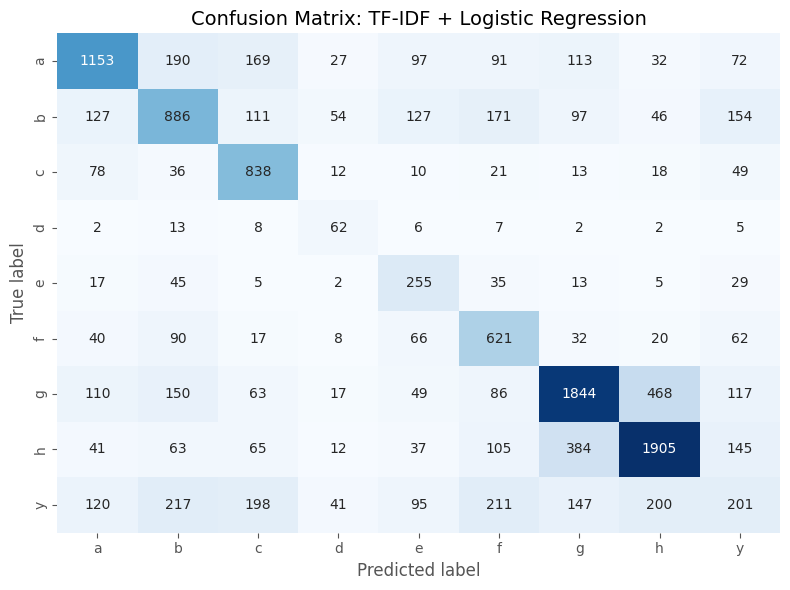

In [30]:
# Confusion Matrix for TF-IDF model
tfidf_cm = confusion_matrix(test_df['label'], tfidf_preds, labels=sorted(CPC_DEFINITIONS.keys()))

# Plot Confusion Matrix (consistent style)
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    tfidf_cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=sorted(CPC_DEFINITIONS.keys()),
    yticklabels=sorted(CPC_DEFINITIONS.keys()),
    cbar=False,
    ax=ax
)
ax.set_xlabel("Predicted label", fontsize=12)
ax.set_ylabel("True label", fontsize=12)
ax.set_title("Confusion Matrix: TF-IDF + Logistic Regression", fontsize=14)
plt.tight_layout()
plt.show()


In [31]:
# TF-IDF: TP, FP, TN, FN per class
y_true = test_df['label']
y_pred = tfidf_preds
all_classes = sorted(CPC_DEFINITIONS.keys())
tfidf_mcm = multilabel_confusion_matrix(y_true, y_pred, labels=all_classes)

# Collect TP, FP, TN, FN for each class
tfidf_tp_fp_tn_fn = []
for idx, class_label in enumerate(all_classes):
    tn, fp, fn, tp = tfidf_mcm[idx].ravel()
    tfidf_tp_fp_tn_fn.append([class_label, int(tp), int(fp), int(tn), int(fn)])
print("TF-IDF: TP, FP, TN, FN per class")
print(tabulate(tfidf_tp_fp_tn_fn, headers=['Class', 'TP', 'FP', 'TN', 'FN'], tablefmt='grid'))


TF-IDF: TP, FP, TN, FN per class
+---------+------+------+-------+------+
| Class   |   TP |   FP |    TN |   FN |
+=========+======+======+=======+======+
| a       | 1153 |  535 | 10873 |  791 |
+---------+------+------+-------+------+
| b       |  886 |  804 | 10775 |  887 |
+---------+------+------+-------+------+
| c       |  838 |  636 | 11641 |  237 |
+---------+------+------+-------+------+
| d       |   62 |  173 | 13072 |   45 |
+---------+------+------+-------+------+
| e       |  255 |  487 | 12459 |  151 |
+---------+------+------+-------+------+
| f       |  621 |  727 | 11669 |  335 |
+---------+------+------+-------+------+
| g       | 1844 |  801 |  9647 | 1060 |
+---------+------+------+-------+------+
| h       | 1905 |  791 |  9804 |  852 |
+---------+------+------+-------+------+
| y       |  201 |  633 | 11289 | 1229 |
+---------+------+------+-------+------+



> The TF-IDF model shows strong improvements in true positives for almost all classes compared to the rule-based baseline — notably for **'h' (TP = 1905)**, **'g' (TP = 1844)**, and **'c' (TP = 838)**. 
>
> However, high false positives in overlapping classes like **'b' (FP = 804)** and **'y' (FP = 633)** suggest the model still confuses semantically related domains. Despite this, most rare classes ('d', 'e') have significantly fewer false negatives, showing the model’s improved ability to **recall underrepresented labels**.
>
> These results reinforce that while rule-based logic provides interpretability, statistical models like TF-IDF + Logistic Regression generalize much better across a large, imbalanced label space.


In [32]:
# TF-IDF Feature Importance Analysis 
print("Most Important TF-IDF Features per CPC Class:")

# feature names and coefficients
feature_names = tfidf_pipeline.named_steps['tfidf'].get_feature_names_out()
coefficients = tfidf_pipeline.named_steps['classifier'].coef_

# For each class, showing top discriminative features
class_labels = tfidf_pipeline.named_steps['classifier'].classes_
for i, class_label in enumerate(class_labels):
    print(f"\nClass {class_label} ({CPC_DEFINITIONS[class_label]['name']}):")
    print("Top discriminative TF-IDF features:")
    
    # coefficients for this class
    class_coef = coefficients[i]
    
    # top positive features (most indicative of this class)
    top_indices = np.argsort(class_coef)[-10:][::-1]
    top_features = [(feature_names[idx], class_coef[idx]) for idx in top_indices]
    
    for feature, weight in top_features:
        print(f"  {feature:<25} ({weight:.3f})")

Most Important TF-IDF Features per CPC Class:

Class a (Human Necessities):
Top discriminative TF-IDF features:
  patient                   (4.872)
  surgical                  (4.565)
  blood                     (4.111)
  toy                       (4.104)
  dental                    (4.101)
  game                      (3.872)
  prosthesis                (3.789)
  catheter                  (3.731)
  tissue                    (3.676)
  bone                      (3.511)

Class b (Performing Operations; Transporting):
Top discriminative TF-IDF features:
  vehicle                   (5.042)
  welding                   (3.778)
  printing                  (3.665)
  polishing                 (3.204)
  aircraft                  (3.164)
  ink                       (3.049)
  truck                     (3.009)
  steering                  (3.003)
  separation                (2.979)
  seat                      (2.858)

Class c (Chemistry; Metallurgy):
Top discriminative TF-IDF features:
  glass       


> The top TF-IDF features per CPC class align well with domain expectations. For example, class **'a' (Human Necessities)** is dominated by terms like *patient*, *surgical*, and *prosthesis*, while **'h' (Electricity)** shows features like *semiconductor*, *network*, and *circuit*. This confirms that the logistic regression model is learning interpretable, domain-specific patterns — similar to our rule-based logic, but with greater scalability.
>
> In contrast, the most common features for class **'y' (General Tagging)** appear less distinctive and often overlap with other domains (*valve*, *data*, *turbine*), reinforcing why this class had the lowest F1-score.


### Checking performance on train and test to assess overfitting

We compare the TF-IDF + Logistic Regression model's accuracy and macro F1 on both the training and test sets to evaluate potential overfitting. A large gap between train and test performance would indicate overfitting, while similar scores suggest good generalization.

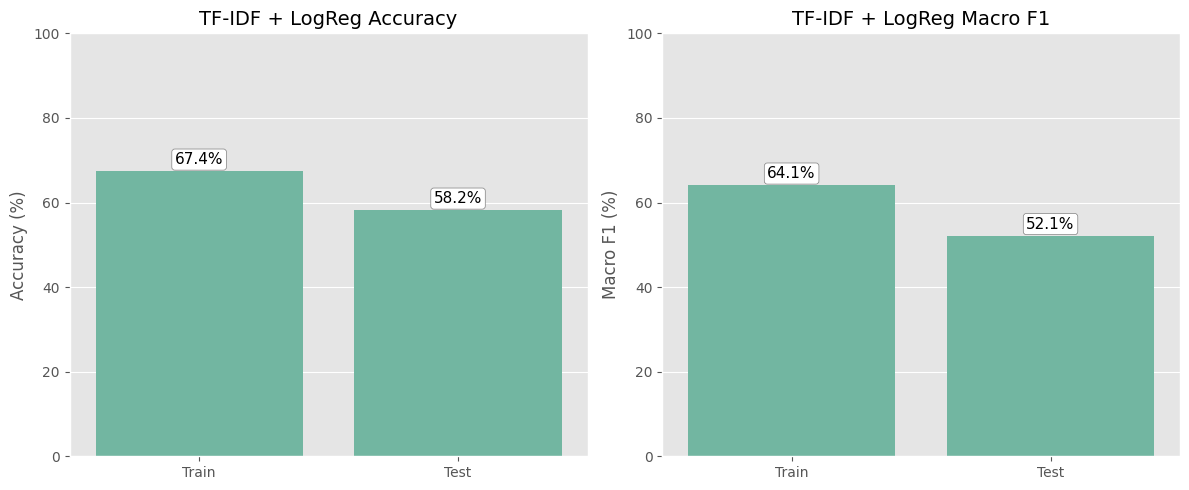

+-------+------------+------------+
| Set   |   Accuracy |   Macro F1 |
+=======+============+============+
| Train |    67.3793 |    64.0767 |
+-------+------------+------------+
| Test  |    58.1561 |    52.121  |
+-------+------------+------------+


In [33]:
# Predict on train set
tfidf_train_preds = tfidf_pipeline.predict(train_df['abstract'])
tfidf_train_acc = accuracy_score(train_df['label'], tfidf_train_preds)
tfidf_train_report = classification_report(train_df['label'], tfidf_train_preds, output_dict=True)

tfidf_perf_df = pd.DataFrame({
    'Set': ['Train', 'Test'],
    'Accuracy': [tfidf_train_acc * 100, tfidf_acc * 100],
    'Macro F1': [tfidf_train_report['macro avg']['f1-score'] * 100, tfidf_report['macro avg']['f1-score'] * 100]
})

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.set_palette("Set2")

# Accuracy plot
sns.barplot(x='Set', y='Accuracy', data=tfidf_perf_df, ax=axes[0])
axes[0].set_title('TF-IDF + LogReg Accuracy', fontsize=14)
axes[0].set_ylabel('Accuracy (%)', fontsize=12)
axes[0].set_xlabel('')
axes[0].set_ylim(0, 100)
for i, v in enumerate(tfidf_perf_df['Accuracy']):
    axes[0].annotate(f"{v:.1f}%", (i, v + 1), ha='center', va='bottom', fontsize=11, color='black',
                     bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.2'))

# Macro F1 plot
sns.barplot(x='Set', y='Macro F1', data=tfidf_perf_df, ax=axes[1])
axes[1].set_title('TF-IDF + LogReg Macro F1', fontsize=14)
axes[1].set_ylabel('Macro F1 (%)', fontsize=12)
axes[1].set_xlabel('')
axes[1].set_ylim(0, 100)
for i, v in enumerate(tfidf_perf_df['Macro F1']):
    axes[1].annotate(f"{v:.1f}%", (i, v + 1), ha='center', va='bottom', fontsize=11, color='black',
                     bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.2'))

plt.tight_layout()
plt.show()

print(tabulate(tfidf_perf_df, headers='keys', tablefmt='grid', showindex=False))


> The model performs better on the training set, as expected, but the drop to the test set is moderate. This suggests some overfitting, but the model still generalizes reasonably well given the dataset's size and class imbalance. Further regularization or advanced models may help close this gap.

### Baseline Performance Comparison: Random, Rule-Based, and TF-IDF Approaches

In [34]:
# Complete Performance Comparison: All Approaches
print("Complete Performance Comparison: All Baseline Approaches")
print("=" * 70)

complete_results = {
    'Stratified Random': {
        'accuracy': 15.74,
        'macro_f1': 11.22,
        'approach': 'Statistical baseline'
    },
    'Most Frequent': {
        'accuracy': 20.65,
        'macro_f1': 3.80,
        'approach': 'Naive baseline'
    },
    'Rule-Based': {
        'accuracy': rule_based_accuracy * 100,
        'macro_f1': rule_based_report['macro avg']['f1-score'] * 100,
        'approach': 'Domain knowledge'
    },
    'TF-IDF + LogReg': {
        'accuracy': tfidf_acc * 100,
        'macro_f1': tfidf_report['macro avg']['f1-score'] * 100,
        'approach': 'Statistical ML'
    }
}

complete_comparison_df = pd.DataFrame(complete_results).T.round(2)
print(complete_comparison_df)


Complete Performance Comparison: All Baseline Approaches
                    accuracy   macro_f1              approach
Stratified Random      15.74      11.22  Statistical baseline
Most Frequent          20.65        3.8        Naive baseline
Rule-Based         32.272319  28.092808      Domain knowledge
TF-IDF + LogReg    58.156081  52.121003        Statistical ML


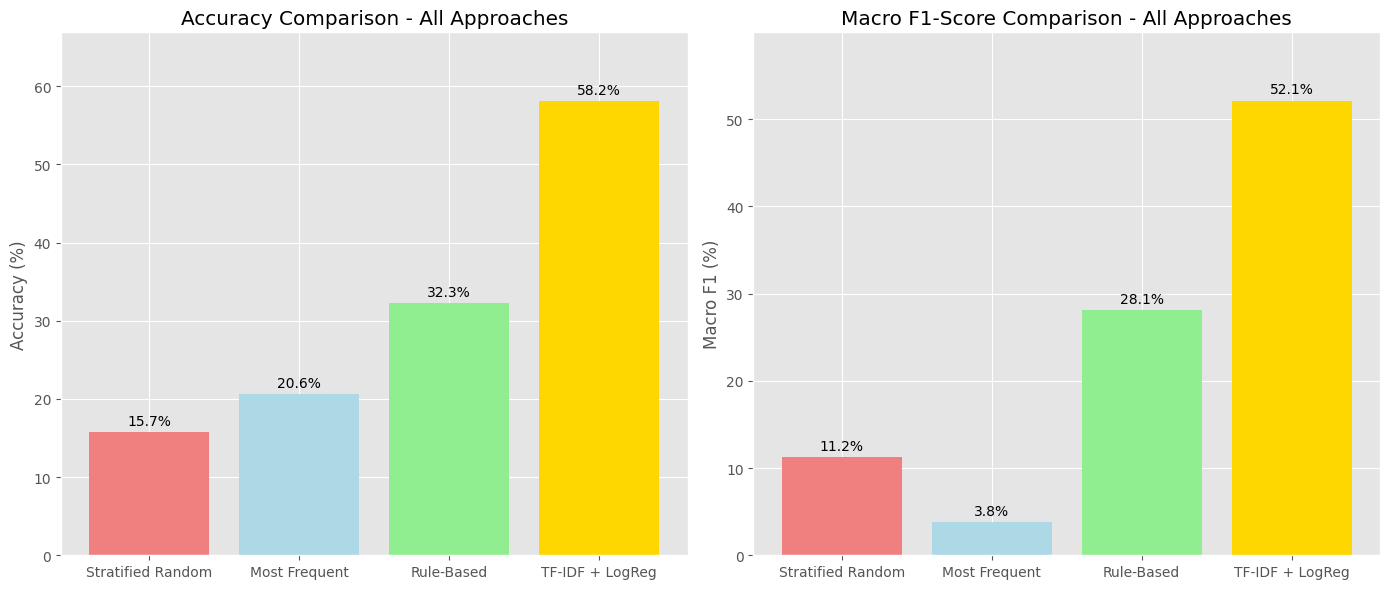

In [35]:
# visualization with all 4 approaches
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

methods = list(complete_results.keys())
accuracies = [complete_results[method]['accuracy'] for method in methods]
f1_scores = [complete_results[method]['macro_f1'] for method in methods]
colors = ['lightcoral', 'lightblue', 'lightgreen', 'gold']

# Accuracy comparison
bars1 = ax1.bar(methods, accuracies, color=colors)
ax1.set_title('Accuracy Comparison - All Approaches')
ax1.set_ylabel('Accuracy (%)')
ax1.set_ylim(0, max(accuracies) * 1.15)
for bar, acc in zip(bars1, accuracies):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{acc:.1f}%', ha='center', va='bottom')

# F1 comparison
bars2 = ax2.bar(methods, f1_scores, color=colors)
ax2.set_title('Macro F1-Score Comparison - All Approaches')
ax2.set_ylabel('Macro F1 (%)')
ax2.set_ylim(0, max(f1_scores) * 1.15)
for bar, f1 in zip(bars2, f1_scores):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{f1:.1f}%', ha='center', va='bottom')

# Ensure x-axis labels are horizontal
for ax in [ax1, ax2]:
    ax.set_xticklabels(methods, rotation=0)

plt.tight_layout()
plt.show()

> **Notes:**  
> - **TF-IDF + Logistic Regression** achieves the highest baseline: **58.2% accuracy**, **52.1% macro F1**.  
> - **Rule-based classifier**: **32.3% accuracy**, **28.1% macro F1**—shows domain knowledge helps, but is limited.  
> - **Stratified random** and **most frequent**: macro F1 below **12%**, highlighting task difficulty and class imbalance.  
> - These baselines demonstrate the value of interpretable rules and motivate advanced models for better generalization.
